## 0. Unigram BLEU score


Modified precision Pₙ: Sum of the clipped n-gram counts for all the candidate sentences in the corpus divide by the number of candidate n-grams


(In the case of multiple reference sentences, r is taken to be the sum of the lengths of the sentences whose lengths are closest to the lengths of the candidate sentences.µ

In [ ]:
#!/usr/bin/env python3
"Unigram BLEU score"
import numpy as np


def uni_bleu(references, sentence):
    "calculates the unigram BLEU score for a sentence"

    d = {s: sentence.count(s) for s in sentence}
    count = d.values()

    L = []
    for ref in references:
        d = {s: ref.count(s) for s in sentence}
        L.append(list(d.values()))
    cc = np.array(L)
    count_clip = cc.max(axis=0)

    p = sum(count_clip) / sum(count)
    # print(sum(count_clip) , sum(count))
    # print(count, count_clip)
    c = len(sentence)
    """
    r is taken to be the sum of the lengths of the sentences whose lengths
     are closest to the lengths of the candidate sentences
    """
    r_list = [(abs(len(r) - c), i) for i, r in enumerate(references)]
    r_ind = min(r_list)[1]
    r = len(references[r_ind])

    """
    Method2
    r_list = np.array([np.abs(len(s)-c) for s in references])
    r_ind = np.argwhere(r_list == np.min(r_list))
    lens = np.array([len(s) for s in references])[r_ind]
    r = np.min(lens)
    """
    # Brevity Penalty 
    if c > r:
        BP = 1
    else:
        BP = np.exp(1 - (r / c))
    # print(BP,p)
    return BP * p

In [ ]:
references = [["the", "cat", "is", "on", "the", "mat"], ["there", "is", "a", "cat", "on", "the", "mat"]]
sentence = ["the"]*7

print(uni_bleu(references, sentence))

0.2857142857142857


In [ ]:
2/7

0.2857142857142857

In [ ]:
my_dict = {s: sentence.count(s) for s in sentence}

In [ ]:
my_dict

{'a': 2, 'cat': 1, 'here': 1, 'is': 1, 'there': 1}

In [ ]:
sum(my_dict.values())

6

In [ ]:
d = {s: sentence.count(s) for s in sentence}
count = d.values()

In [ ]:
L=[]
for ref in references:
     d = {s: ref.count(s) for s in sentence}
     L.append(list(d.values()))
cc = np.array(L)
count_clip = cc.max(axis=0)

In [ ]:
cc

array([[0, 1, 0, 1, 0],
       [1, 1, 1, 1, 0]])

In [ ]:
count_clip = cc.max(axis=0)

In [ ]:
sum(count_clip)

4

In [ ]:
count_clip = []
T = [list(d.values()) for d in L]

In [ ]:
T

[[0, 1, 0, 1, 0], [1, 1, 1, 1, 0]]

In [ ]:
np.array(T)

array([[0, 1, 0, 1, 0],
       [1, 1, 1, 1, 0]])

## 1. N-gram BLEU score

In [ ]:
references = [["the", "cat", "is", "on", "the", "mat"], ["there", "is", "a", "cat", "on", "the", "mat"]]


In [ ]:
L = ["is","there", "is", "a","is","there", "cat", "here"]
n = 2
c = len(L)
M = []
for i in range(c):
    l = L[i:i+n]
    if len(l) == n:
        listToStr = ' '.join(map(str, l))
        M.append(listToStr)

In [ ]:
def ngram_list(L, n):
    "contiguous sequence of n items"
    c = len(L)
    M = []
    for i in range(c):
        ngram = L[i:i + n]
        if len(ngram) == n:
            listToStr = ' '.join(map(str, ngram)) # converting list to strings
            M.append(listToStr)
    return M

In [ ]:
M

['is there', 'there is', 'is a', 'a is', 'is there', 'there cat', 'cat here']

In [ ]:
[M.count(m) for m in M]

[2, 1, 1, 1, 2, 1, 1]

In [ ]:
d = {s: M.count(s) for s in M}
count = d.values()

In [ ]:
count

dict_values([2, 1, 1, 1, 1, 1])

In [ ]:
#!/usr/bin/env python3
"N-gram BLEU score"
import numpy as np


def ngram_bleu(references, sentence, n):
    "calculates the n-gram BLEU score for a sentence"
    c = len(sentence)

    r_list = [(abs(len(r) - c), i) for i, r in enumerate(references)]
    r_ind = min(r_list)[1]
    r = len(references[r_ind])
    #print("c=", c, "r=", r)

    sentence = ngram_list(sentence, n)
    references = [ngram_list(ref, n) for ref in references]
    #print("sentence: ", sentence, "references: ", references)

    d = {s: sentence.count(s) for s in sentence}
    count = d.values()

    L = []
    for ref in references:
        d = {s: ref.count(s) for s in sentence}
        L.append(list(d.values()))
    cc = np.array(L)
    count_clip = cc.max(axis=0)

    p = sum(count_clip) / sum(count)
    # print(sum(count_clip) , sum(count))
    #print(count, count_clip)

    if c > r:
        BP = 1
    else:
        BP = np.exp(1 - (r / c))
    # print(BP,p)
    return BP * p

In [ ]:
references = [["the", "cat", "is", "on", "the", "mat"], ["there", "is", "a", "cat", "on", "the", "mat"]]
sentence = ["there", "is", "a", "cat", "here"]

print(ngram_bleu(references, sentence, 2))

c= 5 r= 6
sentence:  ['there is', 'is a', 'a cat', 'cat here'] references:  [['the cat', 'cat is', 'is on', 'on the', 'the mat'], ['there is', 'is a', 'a cat', 'cat on', 'on the', 'the mat']]
dict_values([1, 1, 1, 1]) [1 1 1 0]
0.6140480648084865


## 2. Cumulative N-gram BLEU score


Cumulative scores refer to the calculation of individual n-gram scores at all orders from 1 to n and weighting them by calculating the weighted geometric mean.

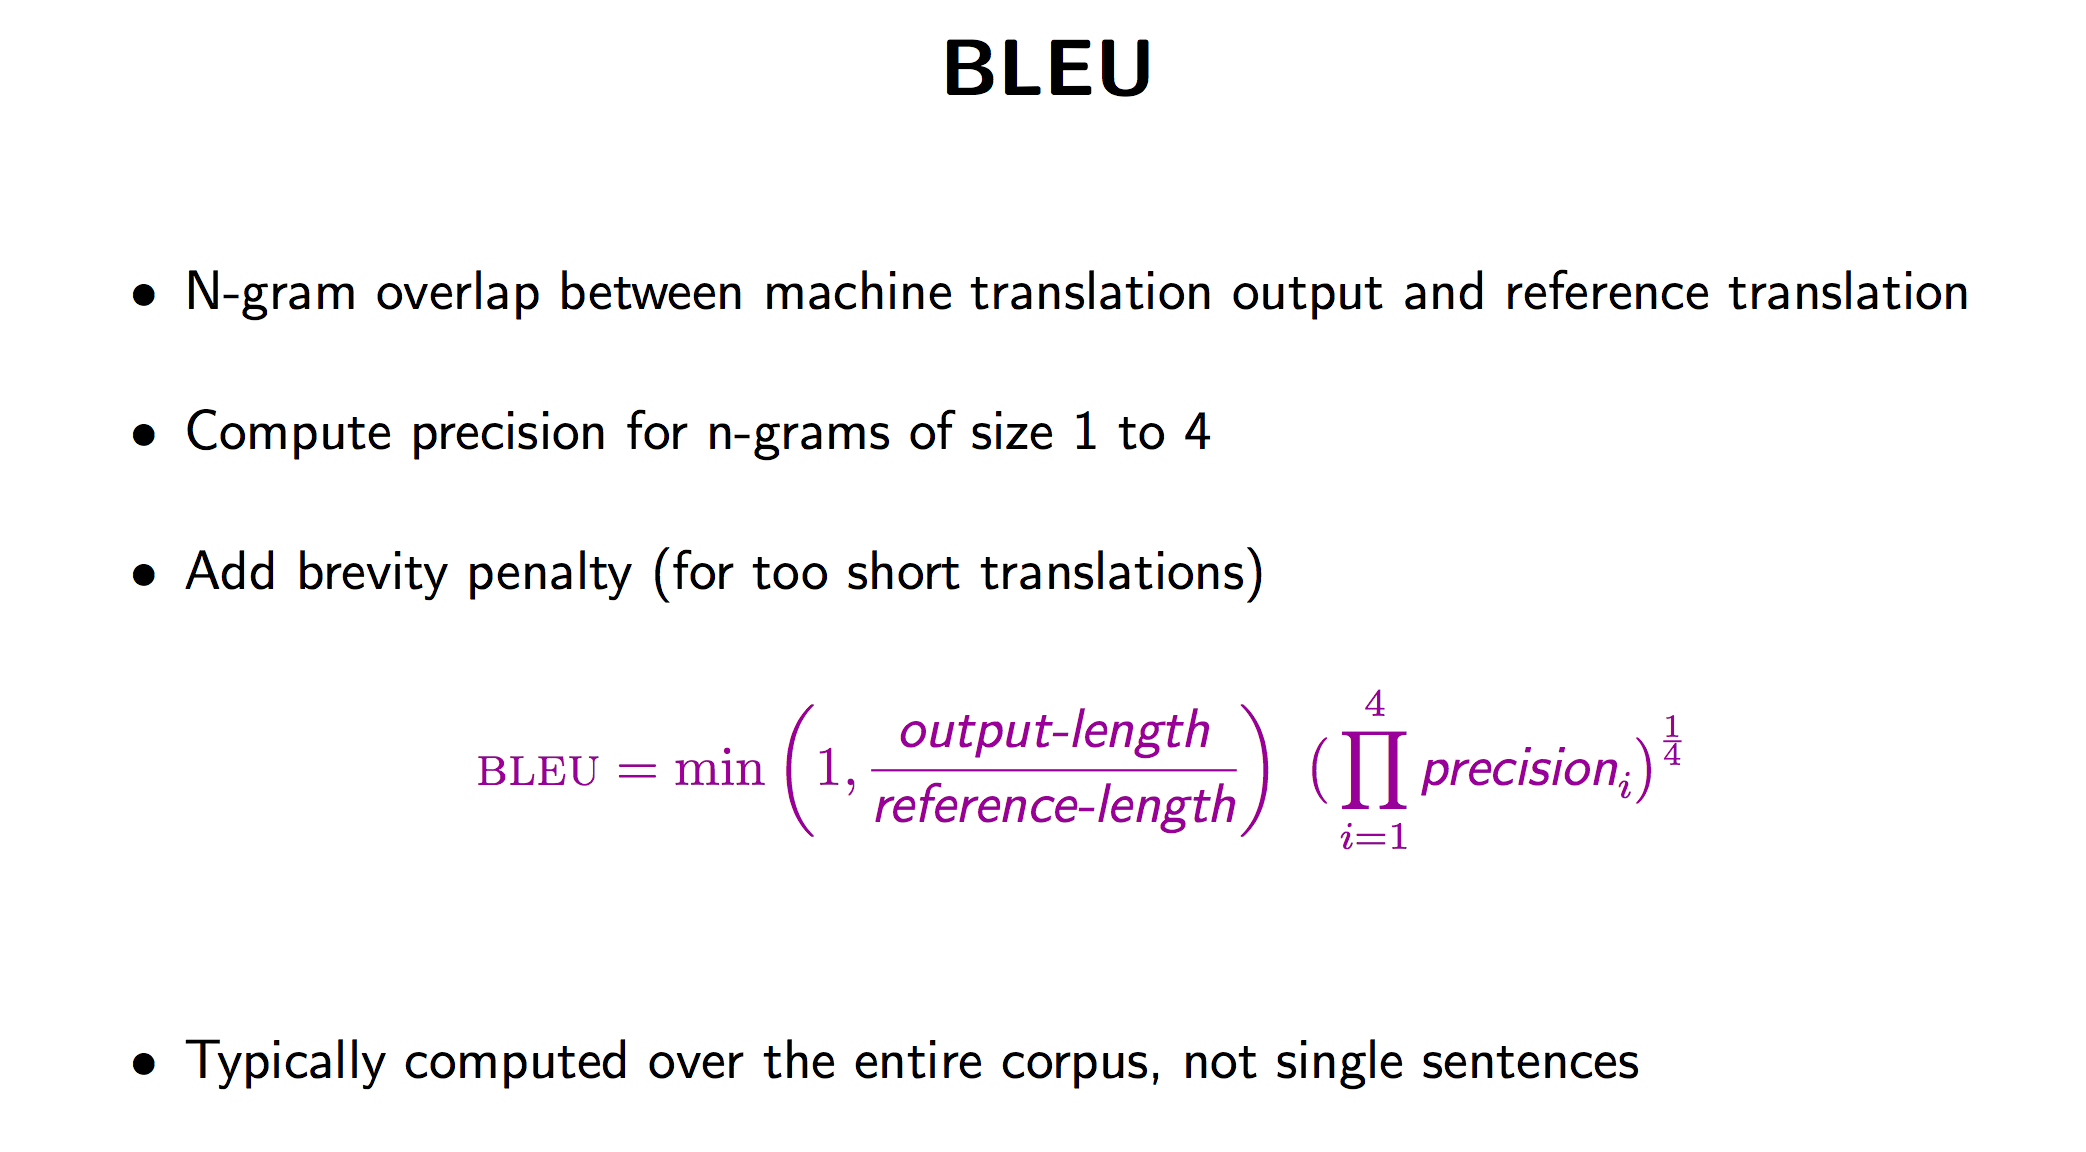

The geometric mean is calculated as the N-th root of the product of all values, where N is the number of values.

Geometric Mean = N-root(x1 * x2 * … * xN)
For example, if the data contains only two values, the square root of the product of the two values is the geometric mean. For three values, the cube-root is used, and so on.

In [ ]:
#!/usr/bin/env python3
"Cumulative N-gram BLEU score"
import numpy as np


def ngram_list(L, n):
    "contiguous sequence of n items"
    c = len(L)
    M = []
    for i in range(c):
        ngram = L[i:i + n]
        if len(ngram) == n:
            listToStr = ' '.join(map(str, ngram))
            M.append(listToStr)
    return M


def cumulative_bleu(references, sentence, n):
    "calculate the cumulative n-gram BLEU score for a sentence"
    c = len(sentence)
    r_list = [(abs(len(r) - c), i) for i, r in enumerate(references)]
    r_ind = min(r_list)[1]
    r = len(references[r_ind])

    if c > r:
        BP = 1
    else:
        BP = np.exp(1 - (r / c))

    weights = [1 / n for i in range(n)]

    Bleu = 1

    for i in range(1, n + 1):

        sentence_i = ngram_list(sentence, i)
        references_i = [ngram_list(ref, i) for ref in references]

        d = {s: sentence_i.count(s) for s in sentence_i}
        count = d.values()

        L = []
        for ref in references_i:
            d = {s: ref.count(s) for s in sentence_i}
            L.append(list(d.values()))
        cc = np.array(L)
        count_clip = cc.max(axis=0)

        precision_i = sum(count_clip) / sum(count)

        Bleu *= precision_i

    return BP * (Bleu ** (1 / n))


In [ ]:
references = [["the", "cat", "is", "on", "the", "mat"], ["there", "is", "a", "cat", "on", "the", "mat"]]
sentence = ["there", "is", "a", "cat", "here"]

print(cumulative_bleu(references, sentence, 4))



0.5475182535069453


In [ ]:
#!/usr/bin/env python3
"Cumulative N-gram BLEU score"
import numpy as np


def ngram_list(L, n):
    "contiguous sequence of n items"
    c = len(L)
    M = []
    for i in range(c):
        ngram = L[i:i + n]
        if len(ngram) == n:
            listToStr = ' '.join(map(str, ngram))
            M.append(listToStr)
    return M


def cumulative_bleu(references, sentence, n):
    "calculate the cumulative n-gram BLEU score for a sentence"
    c = len(sentence)
    r_list = [(abs(len(r) - c), i) for i, r in enumerate(references)]
    r_ind = min(r_list)[1]
    r = len(references[r_ind])

    if c > r:
        BP = 1
    else:
        BP = np.exp(1 - (r / c))

    weights = [1 / n for i in range(n)]

    Bleu = []

    for i in range (1, n + 1):

        sentence_i = ngram_list(sentence, i)
        references_i = [ngram_list(ref, i) for ref in references]

        d = {s: sentence_i.count(s) for s in sentence_i}
        count = d.values()

        L = []
        for ref in references_i:
            d = {s: ref.count(s) for s in sentence_i}
            L.append(list(d.values()))
        cc = np.array(L)
        count_clip = cc.max(axis=0)

        precision_i = sum(count_clip) / sum(count)
        
        Bleu.append(precision_i)

    s = (w_i * np.log(p_i) for w_i, p_i in zip(weights, Bleu))
    s = BP * np.exp(np.sum(s))

    return s


In [ ]:
references = [["the", "cat", "is", "on", "the", "mat"], ["there", "is", "a", "cat", "on", "the", "mat"]]
sentence = ["there", "is", "a", "cat", "here"]

print(cumulative_bleu(references, sentence, 4))

0.5475182535069453


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


In [ ]:
reference = [['this', 'is', 'small', 'test']]
candidate = ['this', 'is', 'a', 'test']
print(cumulative_bleu(reference, candidate, 4))

0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
